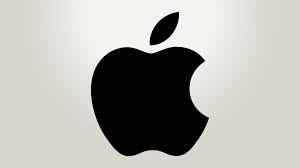

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")


# Zaman serisi dizi oluşturma
# data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/apple-stock-market-data-19802024/AAPL_historical_data.csv


# DATA LOAD

In [2]:
df = pd.read_csv("/kaggle/input/apple-stock-market-data-19802024/AAPL_historical_data.csv")

In [3]:
df['Date'] = pd.to_datetime(df['Date'])

**VERİ SETİNE GENEL BAKIŞ:TANIMLAYICI İSTATİSTİKLER**

In [4]:
def veritanımlama(dataframe,head=True):
    print("------------------------------------SHAPE----------------------------------------------")
    print(dataframe.shape)
    print("------------------------------------İNFO-----------------------------------------------")
    print(dataframe.info())
    print("------------------------------------ISNULL---------------------------------------------")
    print(dataframe.isnull().sum().sort_values(ascending=False))
    print("------------------------------------NUNİQUE--------------------------------------------")
    print(dataframe.nunique())
    print("-------------------------------------DESCRİBE-------------------------------------------")
    display(dataframe.describe())
    if head:
        print("--------------------------------HEAD------------------------------------------------")
        display(dataframe.head())
        print("---------------------------------TAIL------------------------------------------------")
        display(dataframe.tail())

In [5]:
veritanımlama(df,head=True)

------------------------------------SHAPE----------------------------------------------
(11094, 5)
------------------------------------İNFO-----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    11094 non-null  object 
 1   Open    11094 non-null  float64
 2   High    11094 non-null  float64
 3   Low     11094 non-null  float64
 4   Close   11094 non-null  float64
dtypes: float64(4), object(1)
memory usage: 433.5+ KB
None
------------------------------------ISNULL---------------------------------------------
Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64
------------------------------------NUNİQUE--------------------------------------------
Date     11094
Open     10472
High     10304
Low      10117
Close     8084
dtype: int64
-------------------------------------DESCRİBE----------

,Open,High,Low,Close
count,11094.000000,11094.000000,11094.000000,11094.000000
mean,23.236654,23.484468,23.001626,23.254564
std,49.129620,49.645173,48.654514,49.178271
min,0.038245,0.038245,0.037815,0.037815
25%,0.242896,0.248067,0.237920,0.242953
50%,0.442782,0.451501,0.435876,0.444634
75%,18.083088,18.278464,17.904287,18.107803
max,247.960007,250.800003,246.259995,248.130005


--------------------------------HEAD------------------------------------------------


,Date,Open,High,Low,Close
0,1980-12-12 00:00:00-05:00,0.098834,0.099264,0.098834,0.098834
1,1980-12-15 00:00:00-05:00,0.094108,0.094108,0.093678,0.093678
2,1980-12-16 00:00:00-05:00,0.087232,0.087232,0.086802,0.086802
3,1980-12-17 00:00:00-05:00,0.088951,0.089381,0.088951,0.088951
4,1980-12-18 00:00:00-05:00,0.091530,0.091959,0.091530,0.091530


---------------------------------TAIL------------------------------------------------


,Date,Open,High,Low,Close
11089,2024-12-09 00:00:00-05:00,241.830002,247.240005,241.750000,246.750000
11090,2024-12-10 00:00:00-05:00,246.889999,248.210007,245.339996,247.770004
11091,2024-12-11 00:00:00-05:00,247.960007,250.800003,246.259995,246.490005
11092,2024-12-12 00:00:00-05:00,246.889999,248.740005,245.679993,247.960007
11093,2024-12-13 00:00:00-05:00,247.820007,249.289993,246.240005,248.130005


Veri

In [6]:
df

,Date,Open,High,Low,Close
0,1980-12-12 00:00:00-05:00,0.098834,0.099264,0.098834,0.098834
1,1980-12-15 00:00:00-05:00,0.094108,0.094108,0.093678,0.093678
2,1980-12-16 00:00:00-05:00,0.087232,0.087232,0.086802,0.086802
3,1980-12-17 00:00:00-05:00,0.088951,0.089381,0.088951,0.088951
4,1980-12-18 00:00:00-05:00,0.091530,0.091959,0.091530,0.091530
...,...,...,...,...,...
11089,2024-12-09 00:00:00-05:00,241.830002,247.240005,241.750000,246.750000
11090,2024-12-10 00:00:00-05:00,246.889999,248.210007,245.339996,247.770004
11091,2024-12-11 00:00:00-05:00,247.960007,250.800003,246.259995,246.490005
11092,2024-12-12 00:00:00-05:00,246.889999,248.740005,245.679993,247.960007


In [7]:
# MinMaxScaler kullanımı
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df[['Open', 'High', 'Low', 'Close']])

# Ölçeklenmiş veriyi bir DataFrame olarak saklayın
df_scaled = pd.DataFrame(data_scaled, columns=['Open', 'High', 'Low', 'Close'], index=df.index)

# Ölçeklenmiş veriyi inceleyin
print(df_scaled.head())

       Open      High       Low     Close
0  0.000244  0.000243  0.000248  0.000246
1  0.000225  0.000223  0.000227  0.000225
2  0.000198  0.000195  0.000199  0.000197
3  0.000205  0.000204  0.000208  0.000206
4  0.000215  0.000214  0.000218  0.000217


In [8]:
# Giriş ve çıkış verilerini oluşturmak
def create_features_and_labels(data, n_steps=10):
    X, y = [], []
    for i in range(n_steps, len(data)):
        X.append(data[i-n_steps:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# Close sütunu üzerinden örnek oluşturma
n_steps = 10  # Göz önünde bulundurulacak zaman adımı
X, y = create_features_and_labels(df_scaled['Close'].values, n_steps)

print("Girdi şekli:", X.shape)
print("Çıkış şekli:", y.shape)


Girdi şekli: (11084, 10)
Çıkış şekli: (11084,)


# MODEL

In [9]:


# Model tanımlama
model = Sequential([
    LSTM(50, activation='relu', input_shape=(n_steps, 1)),
    Dense(1)
])

# Model derleme
model.compile(optimizer='adam', loss='mse')

# Veriyi yeniden şekillendirme
X = X.reshape((X.shape[0], X.shape[1], 1))

# Modeli eğitme
model.fit(X, y, epochs=50, batch_size=32)


Epoch 1/50
347/347 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0074
Epoch 2/50
347/347 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 5.2596e-05
Epoch 3/50
347/347 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 4.1316e-05
Epoch 4/50
347/347 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 4.8956e-05
Epoch 5/50
347/347 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 4.3058e-05
Epoch 6/50
347/347 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 4.1409e-05
Epoch 7/50
347/347 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 3.9806e-05
Epoch 8/50
347/347 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 3.5933e-05
Epoch 9/50
347/347 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 3.7436e-05
Epoch 10/50
347/347 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 3.4856e-05
Epoch 11/50
347/347 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 3.2417e-05
Epoch 12/50
347/347 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2.9445e-05
Epoch 13/50
347/347 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 3.1511e-05
Epoch 14/50
347/347 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2.9501e-05
Epoch

In [10]:
# Örnek bir tahmin
y_pred = model.predict(X[-1].reshape(1, n_steps, 1))
print("Tahmin:", y_pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
Tahmin: [[1.0065992]]


In [11]:
# 'Close' için ayrı bir scaler
close_scaler = MinMaxScaler()
close_scaled = close_scaler.fit_transform(df[['Close']])

# Eğitim tahminlerini tersine dönüştürme
train_predictions_rescaled = close_scaler.inverse_transform(train_predictions)
y_rescaled = close_scaler.inverse_transform(y.reshape(-1, 1))


plt.figure(figsize=(12, 6))
plt.plot(y_rescaled, label="Gerçek Değerler", color='blue')
plt.plot(train_predictions_rescaled, label="Tahminler", color='orange', linestyle='dashed')
plt.title("Eğitim Verisi Tahminleri")
plt.xlabel("Zaman Adımları")
plt.ylabel("Değer")
plt.legend()
plt.show()



NameError: name 'train_predictions' is not defined

In [ ]:
# Sadece 'Close' sütununu kullanarak ölçeklendirme
close_scaler = MinMaxScaler()
close_scaled = close_scaler.fit_transform(df[['Close']])

# Model eğitimi için veri hazırlama
n_steps = 30  # Zaman adımı sayısı
X, y = [], []

for i in range(n_steps, len(close_scaled)):
    X.append(close_scaled[i-n_steps:i, 0])  # Son 30 adımı al
    y.append(close_scaled[i, 0])  # Hedef değer

X, y = np.array(X), np.array(y)
X = X.reshape((X.shape[0], X.shape[1], 1))



model = Sequential([
    LSTM(50, activation='relu', input_shape=(n_steps, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=20, verbose=1)

# Eğitim tahminleri
train_predictions = model.predict(X)

# Ters ölçeklendirme
train_predictions_rescaled = close_scaler.inverse_transform(train_predictions)
y_rescaled = close_scaler.inverse_transform(y.reshape(-1, 1))

# Grafik çizimi
plt.figure(figsize=(12, 6))
plt.plot(y_rescaled, label="Gerçek Değerler", color='blue')
plt.plot(train_predictions_rescaled, label="Tahminler", color='orange', linestyle='dashed')
plt.title("Eğitim Verisi Tahminleri")
plt.xlabel("Zaman Adımları")
plt.ylabel("Fiyat")
plt.legend()
plt.show()

In [ ]:
# 30 günlük hareketli ortalama ve volatilite (standart sapma)
df['Moving_Avg'] = df['Close'].rolling(window=30).mean()
df['Volatility'] = df['Close'].rolling(window=30).std()

# Eksik değerleri kaldırıyoruz
df = df.dropna()

# İlk 5 satırı kontrol edelim
print(df.head())


In [ ]:
from sklearn.preprocessing import StandardScaler

# Özellikleri ölçeklendiriyoruz
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Close', 'Moving_Avg', 'Volatility']])

# Ölçeklendirilmiş verinin ilk 5 satırını kontrol edelim
print(scaled_data[:5])


In [ ]:

# Özellikleri ölçeklendiriyoruz
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Close', 'Moving_Avg', 'Volatility']])

# K-means kümelemesi
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Küme sonuçlarını görselleştirelim
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# Her bir kümeyi farklı renklerle çizelim
for cluster in range(5):
    cluster_data = df[df['Cluster'] == cluster]
    plt.plot(cluster_data.index, cluster_data['Close'], label=f'Cluster {cluster}')

plt.title("Zaman Serisi Kümelemesi (K-means)")
plt.xlabel("Tarih")
plt.ylabel("Fiyat")
plt.legend()
plt.show()
